### single TLU network

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # iris Setosa

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

### Building an Image Classifier Using the Sequential API

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

2023-05-14 20:31:15.157305: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-14 20:31:15.496584: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-14 20:31:17.648741: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
x_valid, x_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

### Createing the model using the Sequential API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

2023-05-14 20:31:20.951786: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-05-14 20:31:20.951851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: sheded-Latitude-E6520
2023-05-14 20:31:20.951864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: sheded-Latitude-E6520
2023-05-14 20:31:20.952036: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 390.157.0
2023-05-14 20:31:20.952105: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 390.157.0
2023-05-14 20:31:20.952126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 390.157.0


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
model.layers[1].name

'dense'

In [12]:
model.get_layer('dense').name

'dense'

In [13]:
weights, biases = model.get_layer('dense').get_weights()

In [14]:
weights.shape

(784, 300)

In [15]:
biases.shape

(300,)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

2023-05-14 20:31:21.895721: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7151 - accuracy: 0.7632 - val_loss: 0.5243 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4935 - accuracy: 0.8280 - val_loss: 0.4447 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4489 - accuracy: 0.8409 - val_loss: 0.4154 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4206 - accuracy: 0.8529 - val_loss: 0.3992 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4012 - accuracy: 0.8599 - val_loss: 0.3945 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3843 - accuracy: 0.8642 - val_loss: 0.3737 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3705 - accuracy: 0.8697 - val_loss: 0.3674 - val_ac

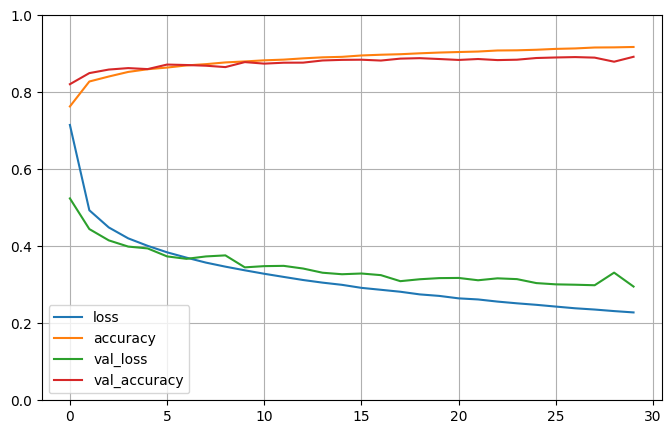

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 77.3735 - accuracy: 0.8310


[77.37349700927734, 0.8309999704360962]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 180ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)